In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Read dataset
data = pd.read_csv("heart_disease.csv")
Y, X = data['target'], data.drop('target', axis = 1)

### Split the dataset into test, train sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
Y_test.shape = (Y_test.shape[0], 1)

### Scale data
def scale_data(X_train, X_test):
    scaller = StandardScaler()
    X_train = scaller.fit_transform(X_train)
    X_test = scaller.transform(X_test)
    return X_train, X_test

X_train, X_test = scale_data(X_train, X_test)

### Setting data correct
X_train = X_train.T
X_test = X_test.T

In [2]:
### Initialize parameters
def initialize_parameters(n_L = [X_train.shape[0], X_train.shape[0]-3, X_train.shape[0]-5, 1], L = 3):
    parameters = {}
    for i in range(1, L+1):
        parameters['W'+str(i)] = np.random.randn(n_L[i], n_L[i-1])*0.01
        parameters['b'+str(i)] = np.zeros((n_L[i], 1))
    return parameters, L

In [3]:
### Forward propagation
def forward_propagation(parameters, L):
    forward_cache = {'A0':X_train}
    for i in range(1, L+1):
        forward_cache['Z'+str(i)] = np.dot(parameters['W'+str(i)], forward_cache['A'+str(i-1)]) + parameters['b'+str(i)]
        if i == L:
            forward_cache['A'+str(i)] = 1/(1+np.exp(-forward_cache['Z'+str(i)]))
        else:
            forward_cache['A'+str(i)] = np.maximum(forward_cache['Z'+str(i)], 0)
    return forward_cache

In [4]:
### Backward Propagation
def backward_propagation(forward_cache, parameters, L):
    dA, dZ = 0, 0
    backward_cache = {}
    for i in range(L, 0, -1):
        m = forward_cache['A'+str(i-1)].shape[1]
        if i == L:
            dZ = forward_cache['A'+str(L)] - Y_train
        else:
            dZ = dA*((forward_cache['A'+str(i)] > 0)*1)
        backward_cache['dW'+str(i)] = np.dot(dZ, forward_cache['A'+str(i-1)].T)/m
        backward_cache['db'+str(i)] = np.sum(dZ, axis = 1, keepdims = True)/m
        if i > 1:
            dA = np.dot(parameters['W'+str(i)].T, dZ)
    return backward_cache


In [5]:
### Computing cost
def compute_cost(A, Y_train):
    m = Y_train.shape[0]
    cost = np.float64((-1.0/m) * (np.dot(Y_train, np.log(A).T) + np.dot(1-Y_train, np.log(1-A).T)))
    return np.squeeze(cost)

In [6]:
### Update parameters
def update_parameters(parameters, backward_cache, learning_rate, L):
    for i in range(1, L+1):
        parameters['W'+str(i)] = parameters['W'+str(i)] - learning_rate*backward_cache['dW'+str(i)]
        parameters['b'+str(i)] = parameters['b'+str(i)] - learning_rate*backward_cache['db'+str(i)]
    return parameters

In [7]:
### train L-Layer Neural Network
def train_L_layer_model(num_iter = 1000, learning_rate = 0.01):
    parameters, L = initialize_parameters(L = 3)
    costs = []
    for iter in range(num_iter):
        forward_cache = forward_propagation(parameters, L)
        cost = compute_cost(forward_cache['A'+str(L)], Y_train)
        costs.append(cost)
        backward_cache = backward_propagation(forward_cache, parameters, L)
        parameters = update_parameters(parameters, backward_cache, learning_rate, L)
    plt.figure()
    plt.plot(list(range(num_iter)), costs, '-r')
    plt.xlabel('# Iterations')
    plt.ylabel('Cost')
    plt.show()
    return parameters, L

In [8]:
### predict test set/new inputs
def predict(parameters, X_test, Y_test, L):
    cache = forward_propagation(parameters, L)
    Y_pred = (cache['A'+str(L)] > 0.5)*1
    print('Accuracy: %d' % float((np.dot(Y_train, Y_pred.T) + np.dot(1 - Y_train, 1 - Y_pred.T)) / float(Y_train.size) * 100) + '%')


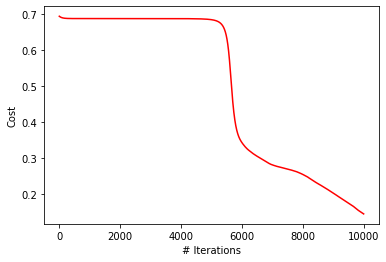

Accuracy: 94%


In [9]:
parameters, L = train_L_layer_model(10000, 0.0225)
predict(parameters, X_test, Y_test, L)